In [377]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
from scipy.optimize import fmin_bfgs
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2. Logistic Regression (2 Variables)

### 2.1 Plotting the data

In [559]:
data = np.loadtxt('ex2_octave/ex2data1.txt', delimiter=',')
x, y = data[:,:2], data[:,2]

In [379]:
y[:5]

array([0., 0., 0., 1., 1.])

In [380]:
np.shape(y)

(100,)

In [381]:
x[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [382]:
np.shape(x)

(100, 2)

In [383]:
def plotData(X, y):
    
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7,
             mew=2, label=r'Admitted')
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7,
            label=r'Not Admitted')
    
    # axes labels
    plt.xlabel(r'Exam 1 Score')
    plt.ylabel(r'Exam 2 Score')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)

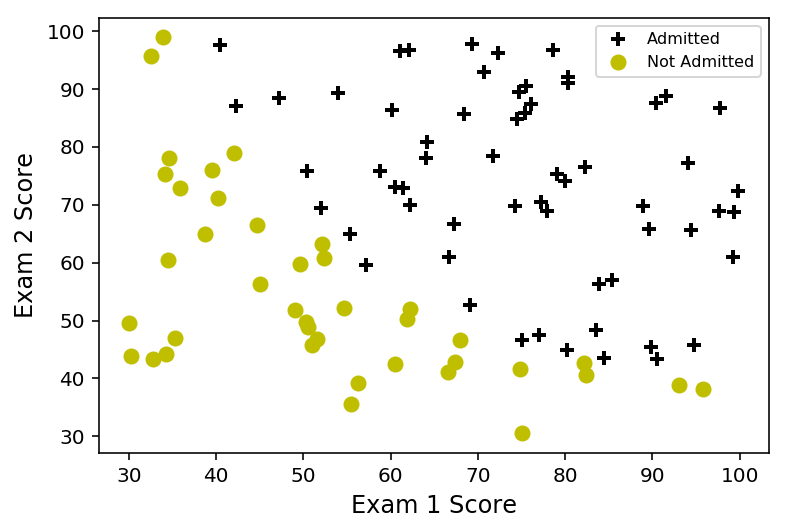

In [384]:
# plot the Data
plotData(x, y)

### 2.2 Sigmoid Function 

In [385]:
#Create the sigmoid function used to transform function to probability space

In [386]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Text(0,0.5,'$g(x)$')

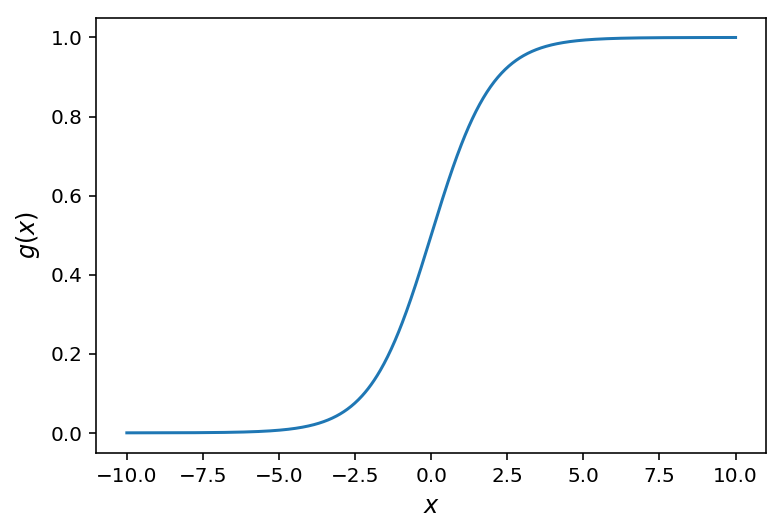

In [387]:
# test on a few values
xx = np.linspace(-10, 10, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')

### 2.3 Cost Function and Gradient

Here we will define auxiliary ```compute_cost``` and ```compute_grad``` functions to use in an overal ```costFunction```. We do this because we will need separate cost function and gradient functions when we use ```scipy.optimize``` in further exercises.

In [388]:
def compute_cost(theta, X, y):
    
    m=len(y)
    
    # tolerance for sigmoid function.
    # i.e., 1-htheta cannot be less than 1e-15
    # this fixes loss of precision errors
    eps = 1e-15
    
    # compute the hypothesis
    htheta = sigmoid(np.dot(X, theta))
    
    # compute J in two terms
    term1 = np.dot(np.log(htheta), y)
    term2 = np.dot(np.log(1-htheta+eps), (1-y))

    # cost function
    J = - 1 / m * (term1 + term2)
    
    return J 

In [389]:
def compute_grad(theta, X, y):
    
    # number of training samples
    m = len(y)
    
    # compute the hypothesis
    htheta = sigmoid(np.dot(X, theta))
    
    # gradient
    grad = np.dot(X.T, (htheta - y)) / m
    
    return grad

In [390]:
#This is only calculated as it needs to be passed into advanced algo
def cost_function(theta, X, y):
    # use auxiliary cost function
    J = compute_cost(theta, X, y)
    
    # use auxiliary gradient function
    grad = compute_grad(theta, X, y)
    
    return J, grad    


In [391]:
# setup the data matrix appropriately
m, n = x.shape

# add intercept term to X
X = np.hstack((np.ones((m, 1)), x))

# initalize theta
initial_theta = np.zeros(n+1)

# compute and display initial cost and gradient
J, grad = cost_function(initial_theta, X, y)

print ('Cost at initial theta (zeros): {0}'.format(J))
print ('Gradient at inital theta (zeros):\n {0}'.format(grad))

Cost at initial theta (zeros): 0.6931471805599445
Gradient at inital theta (zeros):
 [ -0.1        -12.00921659 -11.26284221]


### 1.2.3 Learning parameters with ```scipy.optimize``` using BFGS


Here we are using the scipy BFGS implementation. We only need to give this
function the cost function, the initial parameters, and the gradient. This function
will return the values of theta that minimize the cost function.

In [392]:
# call scipy.optimize BFGS function
theta_new = fmin_bfgs(compute_cost, initial_theta, fprime=compute_grad,
                maxiter=400, args=(X,y), disp=False)

In [393]:
print ('Best fit theta: {0}'.format(theta_new))
print ('Cost function at best fit theta: {0}'.format(compute_cost(theta_new, X, y)))

Best fit theta: [-25.16133643   0.20623177   0.2014716 ]
Cost function at best fit theta: 0.203497701589469


### 1.2.4 Plotting the decision boundary

In [394]:
def plotDecisionBoundary(theta, X, y):
    
    plotData(X[:,1:], y)
    
    # get min and max values
    xx = np.array([np.min(X[:,1]), np.max(X[:,1])])
    
    # get boundary of separation
    yy = (- theta[0] - theta[2] * xx) / theta[1]
    
    plt.plot(xx, yy, lw=1.5)   

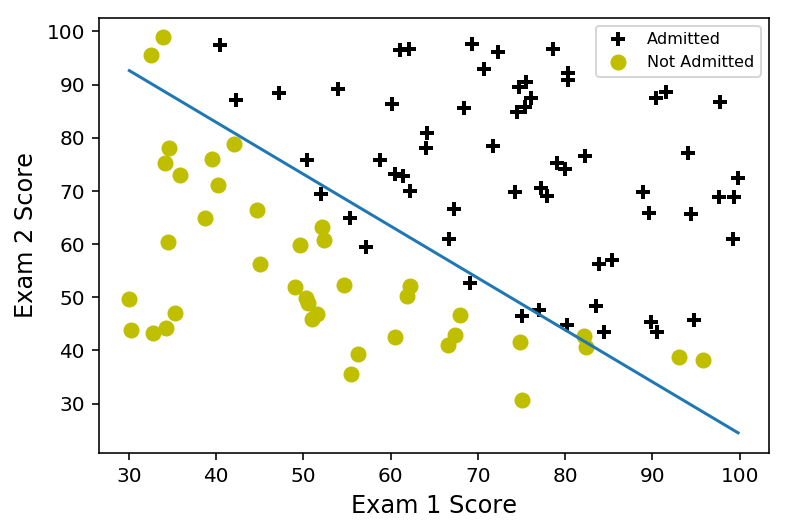

In [395]:
plotDecisionBoundary(theta_new, X, y)

In [396]:
# exam1 score of 45 and exam2 score of 85
vals = np.array([45, 85])
vals = np.hstack((np.array([1]), vals))

prob = sigmoid(np.dot(theta_new, vals))

print ('Probablity of acceptance for exam 1 score: {0} and exam 2 score: {1} is {2} percent.'.format(
    vals[1], vals[2], prob*100))

Probablity of acceptance for exam 1 score: 45 and exam 2 score: 85 is 77.62905643355438 percent.


In [397]:
def predict(theta, X):
    
    htheta = sigmoid(np.dot(X, theta))
    
    return np.array([1 if h > 0.5 else 0 for h in htheta])

In [398]:
# get prediction for training set
p = predict(theta_new, X)

# get training accuracy
print ('Training Accuracy: {0}'.format(np.mean(p==y)*100))

Training Accuracy: 89.0


# Logisitc Regression Playground

**Goal:**
1. Plot history of guessed lines
2. Plot contours of probability space and function itself **[DONE]**
3. Plot 3d probability space **[DONE]**

3. Add labels to probabilities given to ach datapoint on the chart
5. Calculate the cost of each point (chart/visualize and add up to total)

4. Do the logistic regression problem using batch gradiant descent
6. Repeat the same problem with Sklean & Tensorflow
7. Do multi-variate example using example in slack channel


## 1.1 Plot an initial guess of h(theta) before applying sigmoid function (3D Space)

In [429]:
# initalize theta
initial_theta = np.array([[-25.16133643],[0.20623177],[0.2014716]])
np.shape(initial_theta)

(3, 1)

In [430]:
#Calculate the line h(theta)
h_theta=np.dot(X,initial_theta)
h_theta[:5]
#results in a flat line on chart along X1 axis

array([[ -2.30107812],
       [-10.07165908],
       [ -3.08073939],
       [  4.63894965],
       [  6.31747669]])

In [431]:
np.shape(h_theta)

(100, 1)

In [432]:
theta_new

array([-25.16133643,   0.20623177,   0.2014716 ])

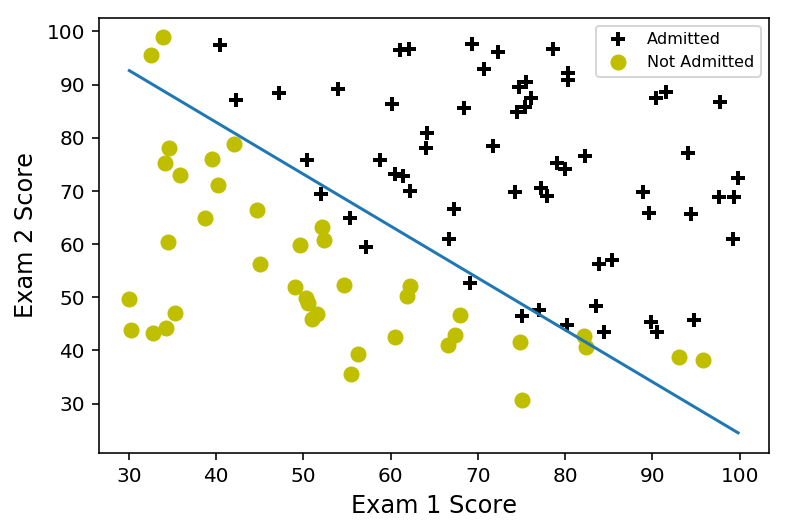

In [433]:
# get min and max values
xx = np.array([np.min(X[:,1]), np.max(X[:,1])])
# get boundary of separation (Set y equal to zero and solve equation for yy)
yy = (- initial_theta[0] - initial_theta[2] * xx) / initial_theta[1]

plotData(X[:,1:], y)
plt.plot(xx, yy, lw=1.5)   
plt.show()


## 1.2 Plot y value of students in 3-D space

In [434]:
from matplotlib import cm

In [435]:
def plot3DData(X, y):
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X[pos,0], X[pos,1], y[pos], color='blue', marker='+')
    ax.scatter(X[neg,0], X[neg,1], y[neg], color='red', marker='o')
    ax.plot(xx, yy, label='Decision Boundary')
    
   # axes labels
    ax.set_xlabel('Exam Score 1')
    ax.set_ylabel('Exam Score 2')
    ax.set_zlabel('Admitted Y/N')

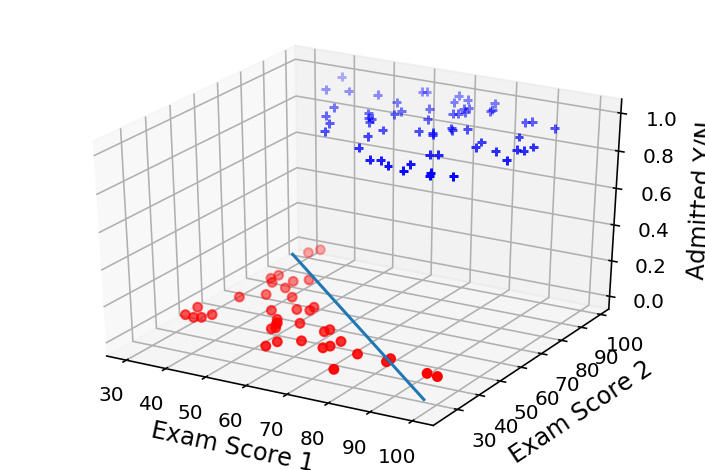

In [436]:
plot3DData(x,y)

## 1.3 Create a 2D contour plot of Sigmoid Decision Function

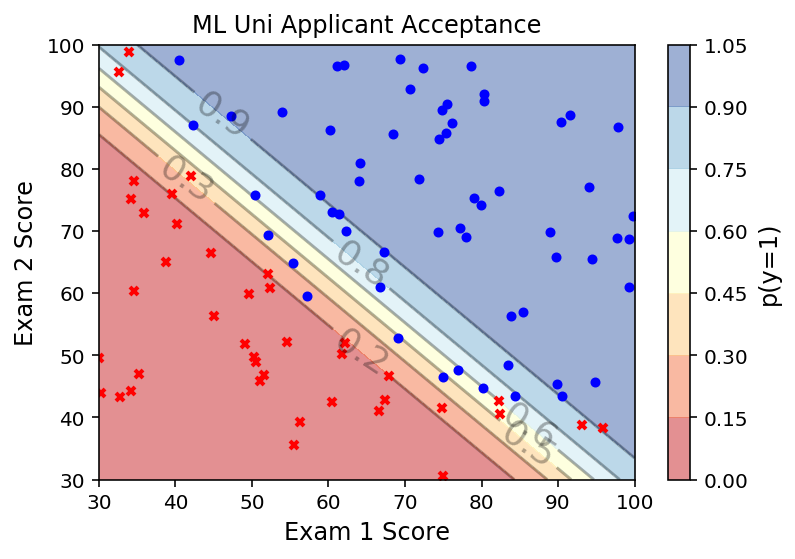

In [437]:
def predict(x1, x2, t0, t1, t2):
    return 1.0/(1.0 + np.exp(-(t0 + t1*x1 + t2*x2)))

# get indices of 1 and 0 y values
pos = y == 1
neg = y == 0
    
x_min, x_max = 30, 100
y_min, y_max = 30, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

z = predict(xx, yy, theta_new[0], theta_new[1], theta_new[2])
z = z.reshape(xx.shape)

ax = plt.gca()

ax.plot(x[pos,0], x[pos,1], 'o', ms=4.0, c='blue')
ax.plot(x[neg,0], x[neg,1], 'x', mew=2, ms=4.0, c='red')
ax.set_title('ML Uni Applicant Acceptance')



c = ax.contourf(xx, yy, z, cmap='RdYlBu', alpha=0.5)
c1 = ax.contour(xx, yy, z, colors='black', alpha=0.30)
plt.clabel(c1, fmt='%2.1f', fontsize=18, inline=True)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

f = plt.gcf()
ax_c = f.colorbar(c)
ax_c.set_label("p(y=1)")
plt.show()

## 1.4 Create a 3D plot of Sigmoid Decision Function

Text(0.5,0.92,'Original Code')

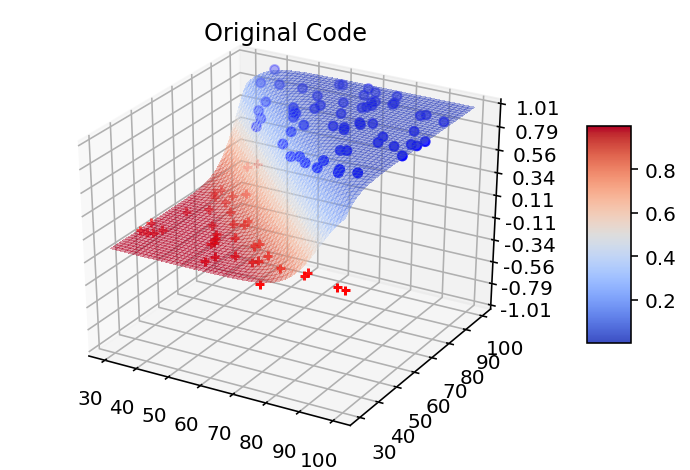

In [442]:
pos = y == 1
neg = y == 0
    
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap=cm.coolwarm_r,linewidth=0, antialiased=False,alpha=0.40)
ax.scatter(x[pos,0], x[pos,1], y[pos], color='blue', marker='o')
ax.scatter(x[neg,0], x[neg,1], y[neg], color='red', marker='+')

ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')

## 1.5 Present the predicted probability for each point on a graph

In [534]:
h_theta=np.dot(X,initial_theta)
predicted_probabilities=sigmoid(h_theta)
predicted_probabilities[:10]

array([[9.10337109e-02],
       [4.22586565e-05],
       [4.39087648e-02],
       [9.90424725e-01],
       [9.98198759e-01],
       [1.07975176e-02],
       [9.98978142e-01],
       [4.23227326e-01],
       [9.99710021e-01],
       [7.35388434e-01]])

In [535]:
np.shape(y)

(100, 1)

In [536]:
y=y.reshape((100,1))

In [538]:
error=predicted_probabilities-y

In [539]:
np.hstack((predicted_probabilities,y,error))

array([[ 9.10337109e-02,  0.00000000e+00,  9.10337109e-02],
       [ 4.22586565e-05,  0.00000000e+00,  4.22586565e-05],
       [ 4.39087648e-02,  0.00000000e+00,  4.39087648e-02],
       [ 9.90424725e-01,  1.00000000e+00, -9.57527464e-03],
       [ 9.98198759e-01,  1.00000000e+00, -1.80124074e-03],
       [ 1.07975176e-02,  0.00000000e+00,  1.07975176e-02],
       [ 9.98978142e-01,  1.00000000e+00, -1.02185781e-03],
       [ 4.23227326e-01,  1.00000000e+00, -5.76772674e-01],
       [ 9.99710021e-01,  1.00000000e+00, -2.89978690e-04],
       [ 7.35388434e-01,  1.00000000e+00, -2.64611566e-01],
       [ 9.09674718e-01,  0.00000000e+00,  9.09674718e-01],
       [ 2.85967534e-02,  0.00000000e+00,  2.85967534e-02],
       [ 9.99270146e-01,  1.00000000e+00, -7.29853661e-04],
       [ 9.99853946e-01,  1.00000000e+00, -1.46054200e-04],
       [ 1.56036825e-01,  0.00000000e+00,  1.56036825e-01],
       [ 9.80959385e-01,  1.00000000e+00, -1.90406146e-02],
       [ 4.27717078e-01,  1.00000000e+00

In [541]:
x[10]

array([95.86155507, 38.22527806])

In [516]:
def plotpredictedData(x, X, y,theta):
    
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    fig, ax = plt.subplots()
    
    h_theta=np.dot(X,theta)
    predicted_probabilities=sigmoid(h_theta)
    
    # plot positive (i.e., accepted) points
    ax.plot(x[pos,0], x[pos,1], '+', color='k', ms=7,
             mew=2, label=r'Admitted')
    
    # plot negative (i.e., not accepted) points
    ax.plot(x[neg,0], x[neg,1], 'o', color='y', ms=7,
            label=r'Not Admitted')
       
    # axes labels
    plt.xlabel(r'Exam 1 Score')
    plt.ylabel(r'Exam 2 Score')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)

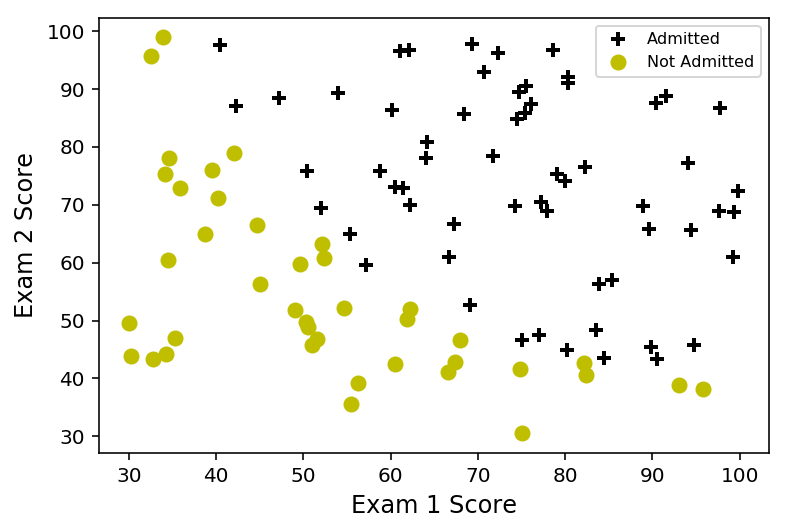

In [517]:
plotpredictedData(x,X,y,initial_theta)

## 1.6 Calculate the optimised parameters using Gradient Descent

In [580]:
def computeCost(theta, X, y):
    
    m=len(y)
    
    # tolerance for sigmoid function.
    # i.e., 1-htheta cannot be less than 1e-15
    # this fixes loss of precision errors
    eps = 1e-15
    
    # compute the hypothesis
    htheta = sigmoid(np.dot(X, theta))
    
    # compute J in two terms
    term1 = np.dot(np.log(htheta), y)
    term2 = np.dot(np.log(1-htheta+eps), (1-y))

    # cost function
    J = - 1 / m * (term1 + term2)
    
    return J

In [581]:
def gradientDescent(X, y, theta, alpha, num_iters):
    #Cost function history
    J_history=np.zeros(num_iters)
    
    #start loop
    theta_new=theta.copy()
    
    for ii in range(num_iters):
        #update theta
        theta_new -= alpha*np.dot(X.T, (np.dot(X,theta_new)-y))/m
        print(theta_new)
        #Store cost function results
        J_history[ii]=computeCost(X,y,theta_new)
        print(J_history[ii])
    return theta_new, J_history

In [582]:
# setup the data matrix appropriately
m, n = x.shape

# add intercept term to X
X = np.hstack((np.ones((m, 1)), x))

# initalize theta
initial_theta = np.zeros(n+1)

In [583]:
#Compute Cost
computeCost(initial_theta, X,y)

0.6931471805599445

In [584]:
np.shape(X)

(100, 3)

In [585]:
np.shape(y)

(100,)

In [586]:
np.shape(initial_theta)

(3,)

In [587]:
initial_theta

array([0., 0., 0.])

In [597]:
theta_new, J_history = gradientDescent(X, y, initial_theta, 0.00001, 2000)

[6.00000000e-06 4.48313536e-04 4.43738412e-04]
34.52843718976192
[1.14117954e-05 8.56371957e-04 8.47045725e-04]
34.519033690959546
[1.62885915e-05 1.22781535e-03 1.21358011e-03]
34.510481261558766
[2.06787812e-05 1.56595457e-03 1.54666885e-03]
34.50270292023963
[2.46263798e-05 1.87380097e-03 1.84933826e-03]
34.49562864883646
[2.81714218e-05 2.15409354e-03 2.12434091e-03]
34.489194762503026
[3.13503200e-05 2.40932354e-03 2.37418039e-03]
34.483343336847845
[3.41961939e-05 2.64175686e-03 2.60113384e-03]
34.478021686886464
[3.67391670e-05 2.85345446e-03 2.80727240e-03]
34.47318189312395
[3.90066383e-05 3.04629089e-03 2.99447990e-03]
34.46878037050429
[4.10235282e-05 3.22197113e-03 3.16446974e-03]
34.46477747634951
[4.28125033e-05 3.38204595e-03 3.31880035e-03]
34.46113715376163
[4.43941798e-05 3.52792586e-03 3.45888918e-03]
34.457826607279785
[4.57873090e-05 3.66089377e-03 3.58602547e-03]
34.45481600787507
[4.70089463e-05 3.78211658e-03 3.70138186e-03]
34.452078224629275
[4.80746042e-05 3.

[2.04724317e-06 5.29058350e-03 4.57409492e-03]
34.42518151782653
[1.54520052e-06 5.29263162e-03 4.57206595e-03]
34.425187077220244
[1.04316203e-06 5.29467218e-03 4.57004437e-03]
34.42519263875258
[5.41127790e-07 5.29670519e-03 4.56803015e-03]
34.42519820226214
[3.90978700e-08 5.29873069e-03 4.56602328e-03]
34.42520376760196
[-4.62927665e-07  5.30074872e-03  4.56402373e-03]
34.42520933463829
[-9.64948759e-07  5.30275931e-03  4.56203148e-03]
34.42521490324933
[-1.46696536e-06  5.30476249e-03  4.56004651e-03]
34.42522047332422
[-1.96897742e-06  5.30675828e-03  4.55806879e-03]
34.42522604476195
[-2.47098491e-06  5.30874673e-03  4.55609831e-03]
34.42523161747059
[-2.97298779e-06  5.31072787e-03  4.55413504e-03]
34.42523719136638
[-3.47498604e-06  5.31270171e-03  4.55217895e-03]
34.42524276637302
[-3.97697962e-06  5.31466830e-03  4.55023003e-03]
34.425248342421014
[-4.47896851e-06  5.31662765e-03  4.54828825e-03]
34.425253919447016
[-4.98095271e-06  5.31857981e-03  4.54635358e-03]
34.4252594

[-0.00024808  0.00576036  0.00411031]
34.42799224713694
[-0.00024858  0.00576069  0.00410999]
34.42799791002011
[-0.00024908  0.00576102  0.00410967]
34.42800357296039
[-0.00024958  0.00576135  0.00410935]
34.42800923595755
[-0.00025008  0.00576167  0.00410903]
34.42801489901139
[-0.00025058  0.005762    0.00410872]
34.428020562121674
[-0.00025108  0.00576232  0.0041084 ]
34.4280262252882
[-0.00025159  0.00576264  0.00410809]
34.42803188851076
[-0.00025209  0.00576297  0.00410777]
34.42803755178912
[-0.00025259  0.00576329  0.00410746]
34.42804321512307
[-0.00025309  0.00576361  0.00410715]
34.42804887851241
[-0.00025359  0.00576392  0.00410684]
34.42805454195693
[-0.00025409  0.00576424  0.00410653]
34.42806020545642
[-0.00025459  0.00576456  0.00410623]
34.42806586901065
[-0.00025509  0.00576487  0.00410592]
34.42807153261944
[-0.00025559  0.00576519  0.00410562]
34.42807719628256
[-0.00025609  0.0057655   0.00410531]
34.428082859999805
[-0.00025659  0.00576581  0.00410501]
34.428088

[-0.00059399  0.0058447   0.00403142]
34.4319118866634
[-0.00059449  0.00584473  0.00403139]
34.431917562917945
[-0.00059499  0.00584476  0.00403137]
34.431923239174985
[-0.00059549  0.00584479  0.00403135]
34.43192891543448
[-0.00059599  0.00584482  0.00403133]
34.43193459169643
[-0.00059649  0.00584485  0.00403131]
34.43194026796082
[-0.00059699  0.00584488  0.00403129]
34.43194594422762
[-0.00059749  0.00584491  0.00403127]
34.43195162049682
[-0.00059799  0.00584493  0.00403124]
34.4319572967684
[-0.00059849  0.00584496  0.00403122]
34.43196297304235
[-0.00059899  0.00584499  0.0040312 ]
34.43196864931865
[-0.00059949  0.00584502  0.00403118]
34.43197432559728
[-0.00059999  0.00584505  0.00403116]
34.43198000187823
[-0.00060049  0.00584507  0.00403114]
34.431985678161475
[-0.00060099  0.0058451   0.00403112]
34.431991354447
[-0.00060149  0.00584513  0.0040311 ]
34.4319970307348
[-0.00060199  0.00584516  0.00403108]
34.43200270702485
[-0.00060249  0.00584519  0.00403106]
34.432008383

Text(0,0.5,'$J(\\theta)$')

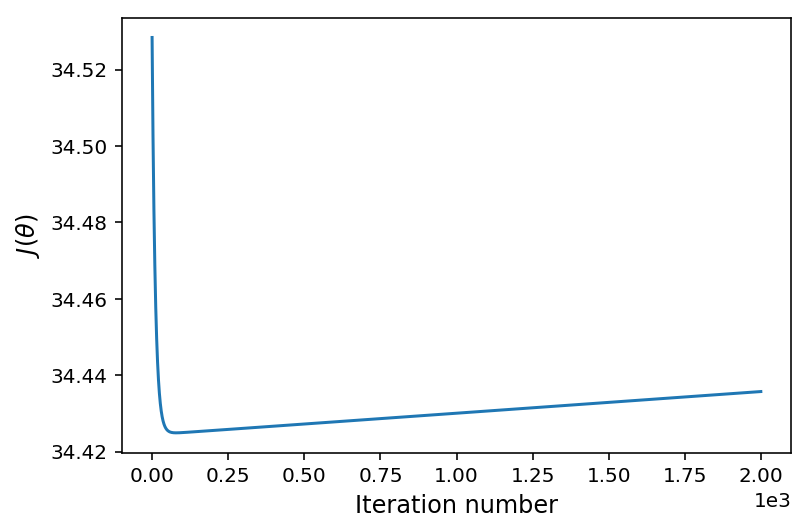

In [598]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$')